#           Mrityunjay Kumar Pandey

### Task4 -: To Explore Decision Tree Algorithm

### Goal is to create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly, for the given ‘Iris’ dataset.

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Exploratory Data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [6]:
df.notna().all(axis=0)

sepal length (cm)    True
sepal width (cm)     True
petal length (cm)    True
petal width (cm)     True
dtype: bool

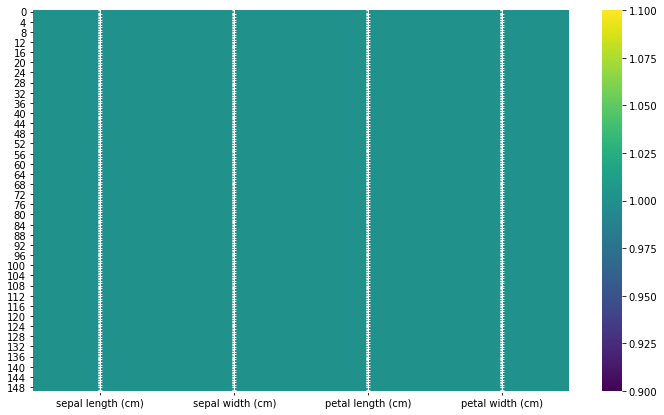

In [7]:
plt.figure(figsize=(12,7))
sns.heatmap(df.notna(),annot=True,cmap='viridis')

In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


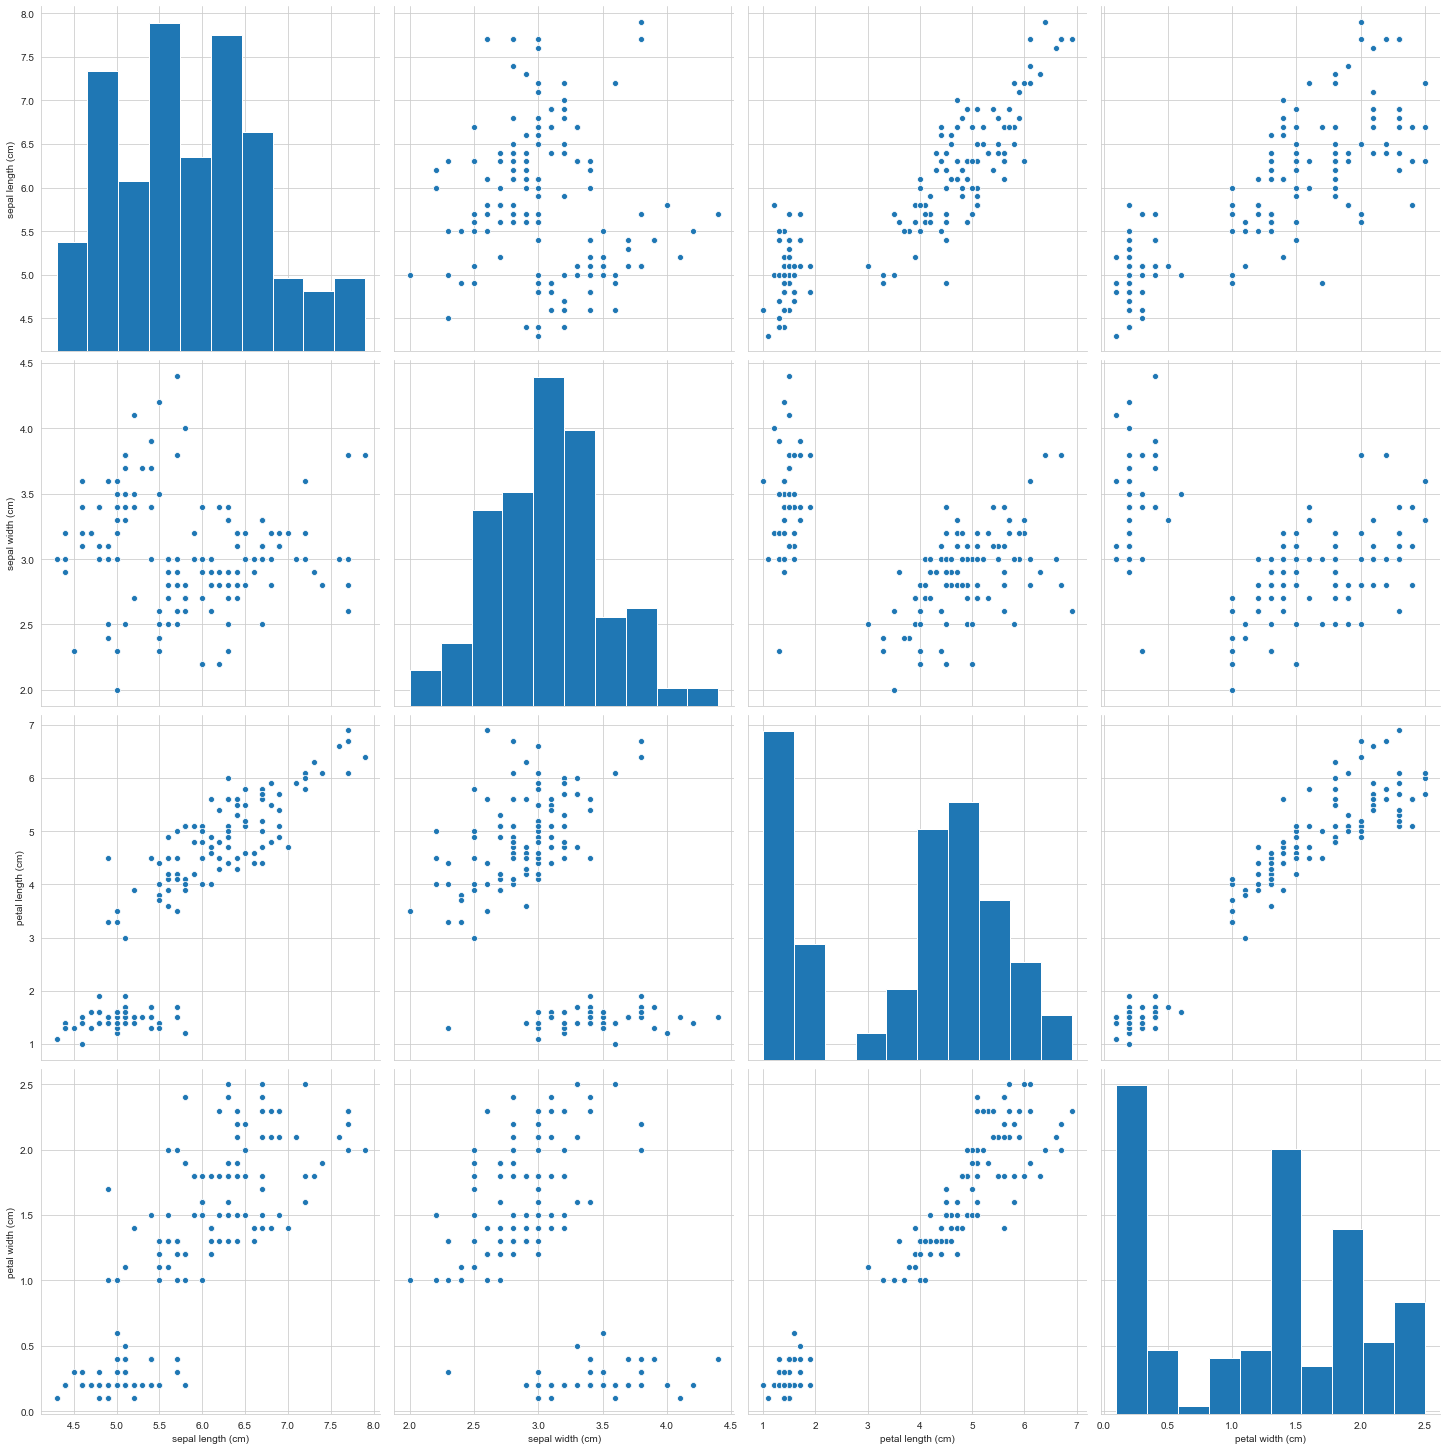

In [9]:
sns.set_style(style='whitegrid')
sns.pairplot(df,height=5)

In [10]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


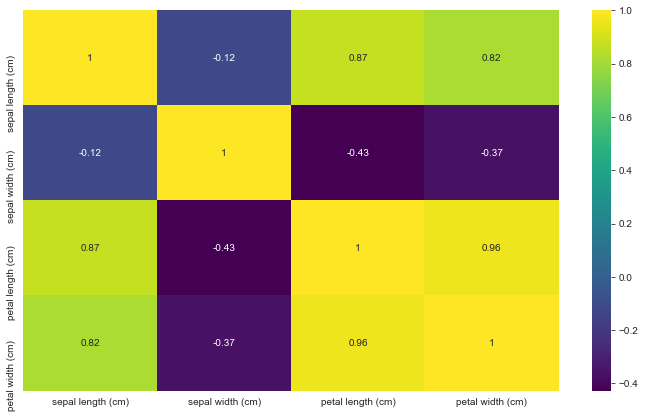

In [11]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

## Splitting the dataset into the Training set and Test set

In [12]:
x = df.values
y = iris.target

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

## Training the Decision Tree Classification model on the Training set

In [15]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting the Test set results

In [16]:
ypred = classifier.predict(xtest)

## Model Evalution

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print(f'Accuracy: {accuracy_score(ytest,ypred)}\nConfusion Matrix:-\n{confusion_matrix(ytest,ypred)}\nClassification Report:-\n{classification_report(ytest,ypred)}\n')


Accuracy: 0.9736842105263158
Confusion Matrix:-
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38




## Model Optimization

In [18]:
from sklearn.model_selection import cross_val_score,KFold
kfold = KFold(n_splits=10,random_state=0)
cvs = cross_val_score(classifier,xtrain,ytrain,cv=kfold,scoring='accuracy')
print(f'Max Accuracy-:{max(cvs)*100} Avg.Accuracy-:{cvs.mean()*100:3f}%  Std-:{cvs.std()*100:3f}%')

Max Accuracy-:100.0 Avg.Accuracy-:95.606061%  Std-:4.401769%


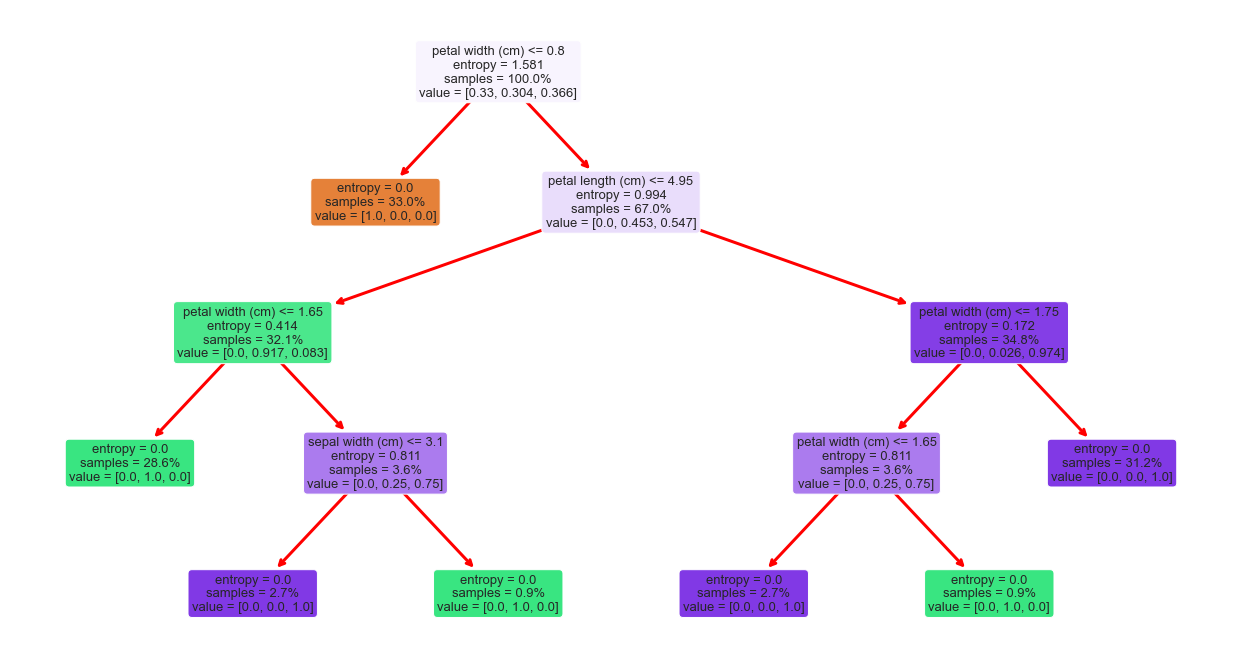

In [19]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(22,12))
out = tree.plot_tree(classifier, feature_names = df.columns,fontsize = 13, filled = 'True',proportion = True, rounded = 10)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

## Making a prediction for an out-of-sample observation

In [20]:
classifier.predict([[3, 5, 4, 2]])

array([1])